In [33]:
import pandas as pd

df = pd.read_csv('TTS_2016_Filtered.csv', index_col=0)
df.head()

,HomeZone,SchoolZone,SchoolCode,Age,Sex,License,Occupation,EmploymentStatus,StudentStatus,Vehicles,IncomeClass,Adults,Children,ExpansionFactor,ModeTakenToSchool,TripToSchoolTime,Dist
1,264,25,9244,19,M,N,O,O,S,2,3,5,0,42.03,B,1300,5.801714
2,38,25,9243,22,M,Y,S,P,S,0,3,2,0,21.01,W,1000,1.529490
3,1039,25,9244,26,M,Y,O,O,S,3,7,5,1,16.17,D,700,32.200970
4,613,25,9244,19,M,Y,O,O,S,1,2,4,0,44.06,B,645,23.502050
5,4160,4160,9998,21,M,Y,M,P,P,4,7,3,0,32.75,9,-1,0.000000


In [25]:
df['Dist'].describe()

count    16125.000000
mean        16.511939
std         15.378102
min          0.000000
25%          5.213549
50%         12.761670
75%         23.398700
max        133.200000
Name: Dist, dtype: float64

In [14]:
df.groupby('ModeTakenToSchool')['Dist'].mean().sort_values(ascending=False)

ModeTakenToSchool
G    35.834117
J    35.595741
D    19.850289
O    18.864049
9    16.458231
B    15.716169
P    15.503711
U    12.640660
T     7.656585
M     7.114726
C     5.530098
W     3.907271
Name: Dist, dtype: float64

In [28]:
def get_mode(m):
    if m in 'BGJ':
        return 'Transit'
    elif m in 'WC':
        return 'Active'
    elif m in 'DPTU':
        return 'Auto'
    else:
        return 'Unknown/Other'

df['ModeAggr'] = df['ModeTakenToSchool'].apply(get_mode)
df.groupby('ModeAggr')['Dist'].describe()

,count,mean,std,min,25%,50%,75%,max
ModeAggr,,,,,,,,
Active,901.0,4.224272,9.761428,0.0,1.075705,1.587002,2.820737,94.65898
Auto,2897.0,18.600061,14.647058,0.0,8.120502,14.945380,24.905350,118.15200
Transit,5151.0,17.576623,12.621034,0.0,8.128813,14.901430,23.870200,101.65350
Unknown/Other,7176.0,16.447519,17.234441,0.0,3.570440,11.743690,23.606088,133.20000


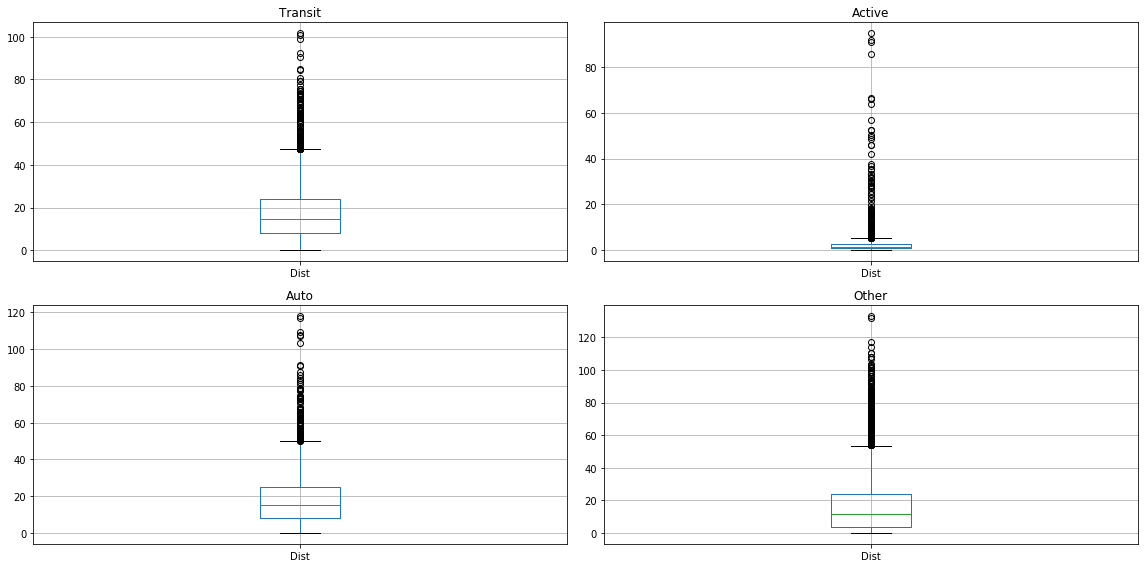

In [23]:
import matplotlib.pyplot as plt
plt.subplots(2, 2, figsize=(16, 8))
modes = df['ModeAggr'].unique()
for i in range(len(modes)):
    plt.subplot(2, 2, i+1)
    df[df['ModeAggr'] == modes[i]].boxplot(column = ['Dist'])
    plt.title(modes[i])
plt.tight_layout()

In [29]:
ml_df = pd.read_csv('TTS_2016_ML_Output.csv')

In [30]:
ml_df

,Home Zone,Age,Gender,License,Employment,Status,Cars,Income,Adults,Children,Mode,Distance,Family
0,264,19,2,0,1,2,2,1,5,0,1,5.801714,1
1,38,22,2,1,2,2,0,1,2,0,10,1.529490,0
2,1039,26,2,1,1,2,3,0,5,1,3,32.200970,1
3,613,19,2,1,1,2,1,2,4,0,1,23.502050,1
4,4160,21,2,1,2,1,4,0,3,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16320,209,43,2,1,1,1,0,2,2,0,0,5.644338,0
16321,166,31,1,1,3,1,1,2,2,0,0,0.000000,0
16322,50,33,2,1,3,2,1,1,2,1,0,0.000000,0
16323,508,30,2,0,1,1,1,0,2,1,0,11.278420,0


In [31]:
df.index

RangeIndex(start=0, stop=16125, step=1)